 Importe as bibliotecas que são necessários

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

 Pegando os arquivos excel, extraidos da b3, por ano. 

Obs.:  O ano vigente precisa ser atualizado em toda execução, pois as informações seguem atualizando constatimente.

In [3]:
ano2021 =pd.read_excel("C:\\Users\Windows\Downloads\dados\movimentacao-2021-01-01-a-2021-12-31.xlsx")
ano2022 = pd.read_excel("C://Users/Windows/Downloads/dados/movimentacao-2022-01-01-a-2022-12-31.xlsx")
ano2023 = pd.read_excel("C://Users/Windows/Downloads/dados/movimentacao-2023-01-01-a-2023-03-17.xlsx")

Gerando um dataframe, juntnado as planilhas e refazendo os index 

In [4]:
df = pd.concat([ano2021, ano2022, ano2023],axis=0, ignore_index=True, verify_integrity=True)

Gerando uma coluna nova, tirando o codigo da ação/fiis pelo texto

In [5]:
df["Codigo"] = df["Produto"].str.split(" ").str.get(0)


Pegando os codigos e tipos de investimento

In [6]:
list(df["Codigo"].drop_duplicates())

['NUBR33',
 'B3SA3',
 'MORC11',
 'MORE11',
 'IRDM11',
 'RAIZ4',
 'VRTA11',
 'VRTA13',
 'CDB',
 'CXCO11',
 'JSAF11',
 'RECR11',
 'HABT11',
 'CPFE3',
 'TAEE11',
 'CPLE6',
 'ITSA4',
 'CSMG3',
 'SANB11',
 'VRTA12',
 'BBSE3',
 'AURE3',
 'MRVE3',
 'Tesouro',
 'OIBR3',
 'TRPL4',
 'RBRP11',
 'HGLG11',
 'BTLG11',
 'HGBS11',
 'MORC12']

Foi feita a identificação de cada ativo e separado por classes | Necessário desenvolver um metodo para automatiza essa parte.

In [10]:
a= [ 'B3SA3',
 'RAIZ4',
 'CPFE3',
 'TAEE11',
 'CPLE6',
 'ITSA4',
 'CSMG3',
 'SANB11',
 'BBSE3',
 'AURE3',
 'MRVE3',
 'OIBR3',
 'TRPL4',]
b = ['NUBR33']
f= [ 'MORC11',
 'MORE11',
 'IRDM11',
 'VRTA11',
 'VRTA13',
 'CXCO11',
 'JSAF11',
 'RECR11',
 'HABT11',
 'VRTA12',
 'RBRP11',
 'HGLG11',
 'BTLG11',
 'HGBS11',
 'MORC12']
t= ['Tesouro']
c=["CDB"]

Quantidade de cada ativo já movimentado no decorrer dos anos.

In [7]:
len(a),len(t),len(c),len(f),len(b)

NameError: name 'a' is not defined

Tipos de dados no nosso dataframe

In [9]:
df.dtypes


Entrada/Saída         object
Data                  object
Movimentação          object
Produto               object
Instituição           object
Quantidade           float64
Preço unitário        object
Valor da Operação     object
Codigo                object
dtype: object

Realizando alteração de caracteres sem valores '-' para 0.
Para que possamos realizar a alteração do tipo object para float


In [11]:
df = df.replace('-', '0')


Alteranado o tipo das colunas no dataframe.
Object para float

In [12]:
df["Valor da Operação"] = df["Valor da Operação"].astype(float)

In [13]:
df["Preço unitário"] = df["Preço unitário"].astype(float)

Novos tipos de dados do nosso dataframe

In [ ]:
df.dtypes

Lendo os tipos de movimentações realizadas.

In [14]:
list(df["Movimentação"].drop_duplicates())

['Transferência - Liquidação',
 'Dividendo',
 'Rendimento',
 'COMPRA / VENDA',
 'Transferência',
 'Atualização',
 'Juros Sobre Capital Próprio',
 'Direitos de Subscrição - Não Exercido',
 'Recibo de Subscrição',
 'Cessão de Direitos - Solicitada',
 'Solicitação de Subscrição',
 'Cessão de Direitos',
 'Direito de Subscrição',
 'Venda',
 'Compra',
 'VENCIMENTO',
 'Grupamento']

Criação de filtro por tipo de investimento [ ações, fiss, tesouro, bdr]

In [15]:
ações =df["Codigo"].isin(a)
fiss=df["Codigo"].isin(f)
tesouro=df["Codigo"].isin(t)
bdr=df["Codigo"].isin(b)

Criando dataframe so com informações de investimento  e rendimento


In [16]:
df_inv = df[(df["Movimentação"]== 'Transferência - Liquidação') | (df["Movimentação"]== 'Transferência')]

In [17]:
df_rend = df[(df["Movimentação"] =='Dividendo') | (df["Movimentação"] =='Rendimento') | (df["Movimentação"] == 'Juros Sobre Capital Próprio')]

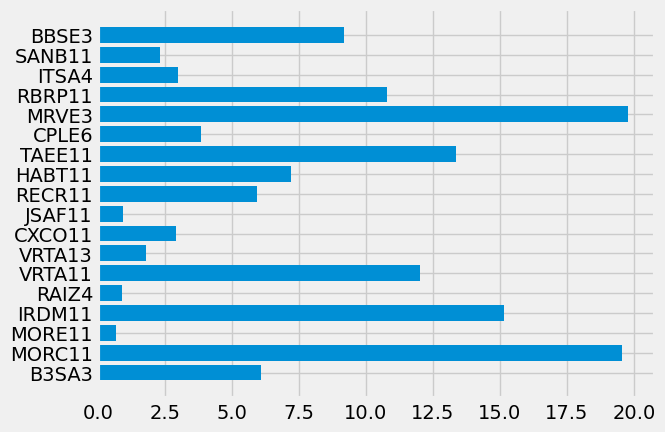

In [61]:
fig, ax = plt.subplots()
ax.barh(df_rend["Codigo"], df_rend["Valor da Operação"])
labels = ax.get_xticklabels()


AttributeError: 'BarContainer' object has no attribute 'show'